In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


import warnings
from collections import Counter
import datetime
import json
import wordcloud


In [2]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('USvideos.csv')
pd.options.display.float_format = '{:.2f}'.format
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df.keys()

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
df['description'] = df['description'].fillna(value='')

In [7]:
len(df['title'].unique())

6455

In [8]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


<ul>
    <li> So the total no of views are 40949 and average views are 2360784 and median is 681861 that man half of treanding video has less number of views than median.
    <li>The average number of likes for a trending video is 74,266, while the average number of likes is 3,711.
    <li>The average number of comments is 8,446 while the median is 1,856
</ul>    

### now lets us check that how many number of title contain capital word to do so we will split and check it in true or false condition

In [9]:
def check_capital_word(c):
    for w in c.split():
        if w.isupper():
            return True
    else:
        return False
    

In [10]:
df['contain_capital_words'] = df['title'].apply(check_capital_word)

In [11]:
df['contain_capital_words'].value_counts()

False    22949
True     18000
Name: contain_capital_words, dtype: int64

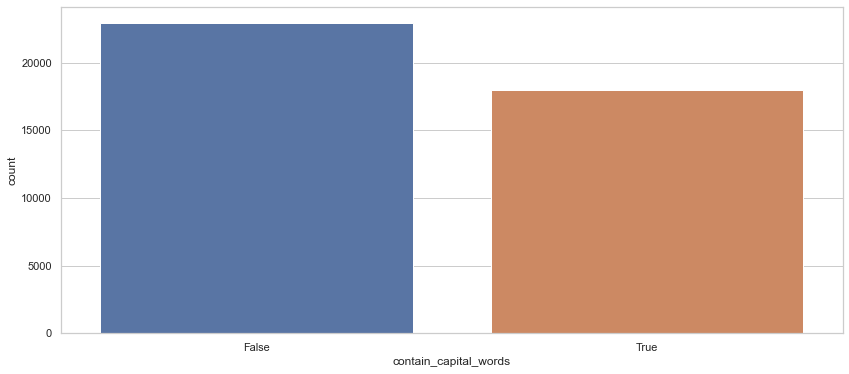

In [12]:
sns.countplot(df['contain_capital_words'])

##### From the countplot we can easily observe that 45% of video title one word is in capital form .

## Now let us check the the lenth of the title

In [13]:
df['length of the title'] = df['title'].apply(lambda x: len(x))

In [14]:
print('no of unique lenth of title ---->',len(df['length of the title'].unique()))
print('-----------------------------------------')
print(df['length of the title'].unique())


no of unique lenth of title ----> 97
-----------------------------------------
[ 34  62  53  32  24  21  41  35  65  86  78  42  38  16  48  52  26  40
  50  67  28  36  47 100  23  60  43  31  54  20  46  57  33  17  51  75
  55  85  58  72  71  98  27  29  94  45  39  68  56  74  61  64  66  76
  80  83  30  59  44  73  70  13  87  77  19  37  84  22  89  18  93  88
  63  79  49  25  99  95  82  14  69  91  12  11  10  81  90  97   6  96
  15   9  92   8   7   4   3]


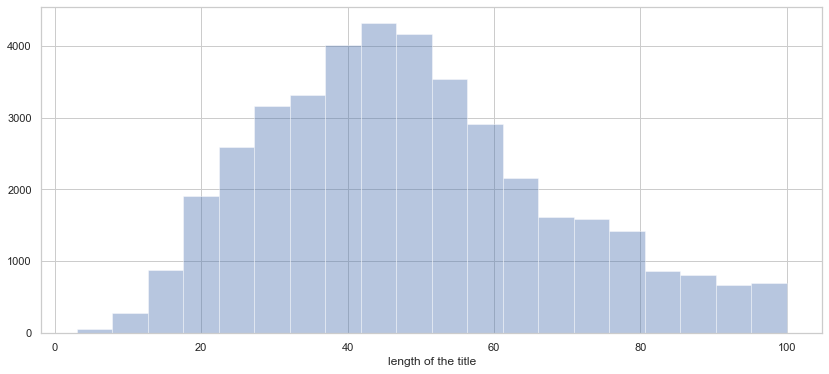

In [15]:

sns.distplot(df['length of the title'], kde=False, bins = 20)

##### so it look like the normal distribution and we can observe that most of tht tilte length are between 30 - 60

## Lets us check the Relation b/w the length and views

To check the relation between them we are going to crate the scatter plot 

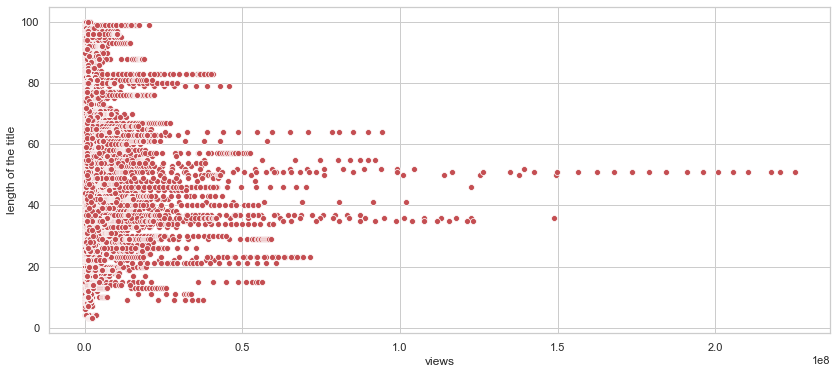

In [23]:
sns.scatterplot(x = df['views'], y = df['length of the title'], color ='r')

###### so from this graph we can see there is no correlation .but we can observe that in bin of 35-55 there are highest number of views

## Let us check the Correlation 

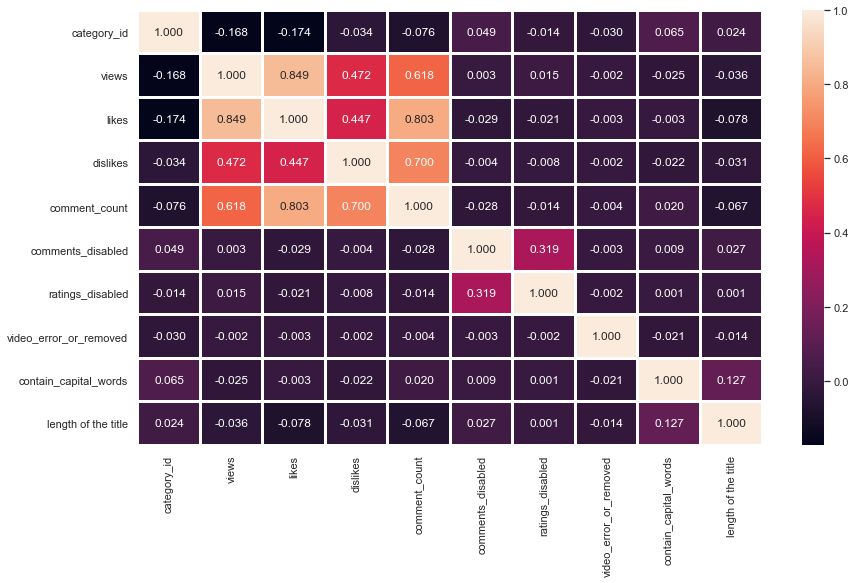

In [27]:
sns.set(rc={'figure.figsize':(14, 8)})
sns.heatmap(df.corr(),annot=True, fmt='.3f',linewidths=2)

##### so we  can see that likes, comment_counts, views are highly correlated with each other

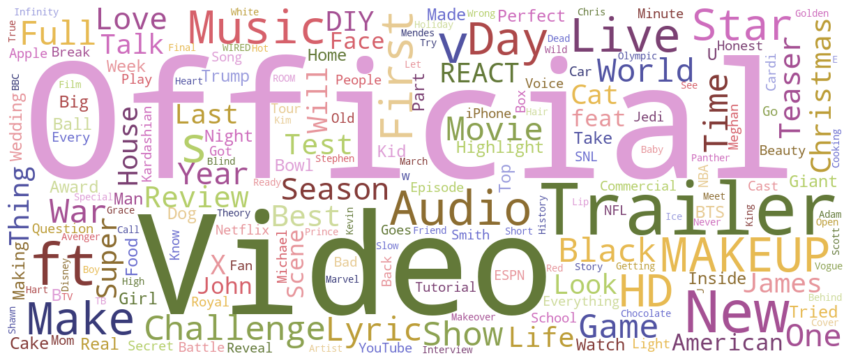

In [28]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")